In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
# import seaborn as sns
# Import statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import glob as glob
# import arrow
import matplotlib
matplotlib.style.use('ggplot')

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import matplotlib as mpl
mpl.rcParams['axes.grid'] = True

In [3]:
dengues = glob.glob("temp/*.csv")
wrong_date_format = dengues[-1]
dengues = dengues[:-1]

In [4]:
wrong_date_df = pd.read_csv(wrong_date_format)
wrong_date_df = wrong_date_df.dropna()

In [5]:
def clean_date_format(date):
    
    str_date = str(date)
    new_date = str_date.split('/')
    
    def clean_dm(dm):
        if len(dm) == 1:
            return '0'+ dm
        else:
            return dm
        
    return new_date[2] + "-" + clean_dm(new_date[0]) + "-" + clean_dm(new_date[1])

def see_split(x):
    return str(x).split('/')

In [6]:
wrong_date_df.sickness_start = wrong_date_df.sickness_start.apply(clean_date_format)
cleaned_date_df = wrong_date_df

In [7]:
list_ = []
for file_ in dengues:
    df = pd.read_csv(file_)
    list_.append(df)
    allDengue = np.concatenate(list_)

list_.append(cleaned_date_df)
allDengue = np.concatenate(list_)

/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JohnnyV/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity

In [8]:
print len(allDengue[0])
print len(wrong_date_df.iloc[0])

21
21


In [9]:
allDengue_copy = allDengue.copy()
allDengue_copy[:,9] = allDengue_copy[:,9].astype('str')

In [10]:
def seperate(data,distinct):
    tmp = []
    for distinct_province in distinct:
        sub_tmp = []
        for data_province in data:
            if data_province[9][:2] == distinct_province:
                sub_tmp.append(data_province)
        sub_tmp = np.array(sub_tmp)
        tmp.append(sub_tmp)
    return np.array(tmp)

def plotByDate(allDates,title):
    df = pd.DataFrame(allDates,columns=['date'])
    df.groupby([df.date.dt.year,df.date.dt.week]).count().plot(kind="bar",figsize=(120,8))
    plt.grid(True);
    plt.title(title)
    plt.xlabel("Weeks")
    plt.ylabel("Cases")
#     plt.savefig(title+".png",dpi = 150)

def cleanDate(raw_dates):
    toRemove = []
    for i,elt in enumerate(raw_dates):
        if elt == '0000-00-00' or type(elt) == float:
            print "to be removed", i, elt
            toRemove.append(i)

    raw_dates = np.delete(raw_dates, toRemove, axis=0)
    return raw_dates

In [11]:
unique_province = [
                   '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
                   '21', '22', '23', '24', '25', '26', '27', '30', '31', '32', '33',
                   '34', '35', '36', '37', '39', '40', '41', '42', '43', '44', '45',
                   '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
                   '57', '58', '60', '61', '62', '63', '64', '65', '66', '67', '70',
                   '71', '72', '73', '74', '75', '76', '77', '80', '81', '82', '83',
                   '84', '85', '86', '90', '91', '92', '93', '94', '95', '96'
                  ]
allProvinces = seperate(allDengue_copy,unique_province)

In [12]:
allProvinces_copy = allProvinces.copy()
allProvinces_copy = allProvinces_copy[:-1]

# temp = allProvinces_copy[0]
# for i in allProvinces_copy[:3]:
    
allProvinces_copy = np.concatenate(([i for i in allProvinces_copy[:]]),axis=0)

In [13]:
allProvinces_df = pd.DataFrame(allProvinces_copy)
allProvinces_df = allProvinces_df.drop([1,2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20],axis=1)
allProvinces_df.columns = ['โรค', 'รหัสจังหวัด', 'date']
allProvinces_df['รหัสจังหวัด'] = allProvinces_df['รหัสจังหวัด'].astype('str').str[:2]
allProvinces_df = allProvinces_df.sort_values(by='date')
# allProvinces_df = allProvinces_df.drop(138990)

In [14]:
import pickle
with open('/Users/JohnnyV/Desktop/Academic/CS/DataMining/project-trial/thailand.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [15]:
allProvinces_df = allProvinces_df[allProvinces_df['รหัสจังหวัด']!='na']
provinces = ([b.get(int(i)) for i in allProvinces_df['รหัสจังหวัด']])
allProvinces_df['จังหวัด'] = provinces

In [16]:
date_df = allProvinces_df.copy()

In [17]:
date_df = date_df.drop(168746)

In [18]:
date_df.date = pd.DatetimeIndex(date_df.date)
# allProvinces_date_df.index = pd.PeriodIndex(date_df.date,freq='M')
date_df.index = date_df.date

In [19]:
bkkCases = allProvinces_df[allProvinces_df['จังหวัด'] == "Bangkok"]
bkkCases = bkkCases.sort_values(by='date')
bkkCases['year'] = bkkCases['date'].astype('str').str[:4]
bkkCases['monthVal'] = pd.DatetimeIndex(bkkCases['date']).month

In [20]:
# date_df[date_df['date'] == '2003-01-01']

In [21]:
bkkCases.head()

,โรค,รหัสจังหวัด,date,จังหวัด,year,monthVal
601,66,10,2003-01-01,Bangkok,2003,1
5032,26,10,2003-01-01,Bangkok,2003,1
3933,26,10,2003-01-01,Bangkok,2003,1
3931,26,10,2003-01-01,Bangkok,2003,1
3927,26,10,2003-01-01,Bangkok,2003,1


In [22]:
bkk_temp = pd.DataFrame(bkkCases.groupby([bkkCases['year'],bkkCases['monthVal']]).size())
bkk_temp.columns = ['bkk_freq']

In [23]:
yr = [i for i in range(3,15)]
mth = [i for i in range(1,13)]

yr_tmp = []
mth_tmp = []
freq_tmp = []
for idx, iele in enumerate(yr):
    for jdx, jele in enumerate(mth):
        yr_tmp.append(iele)
        mth_tmp.append(jele)

for i in bkk_temp.bkk_freq:
    freq_tmp.append(i)
    
yr_tmp = np.array(yr_tmp)
mth_tmp = np.array(mth_tmp)
freq_tmp = np.array(freq_tmp)

bkk_df = pd.DataFrame(yr_tmp)
bkk_df['mth'] = pd.Series(mth_tmp)
bkk_df['freq'] = pd.Series(freq_tmp)
bkk_df.columns = ['yr','mth','freq']

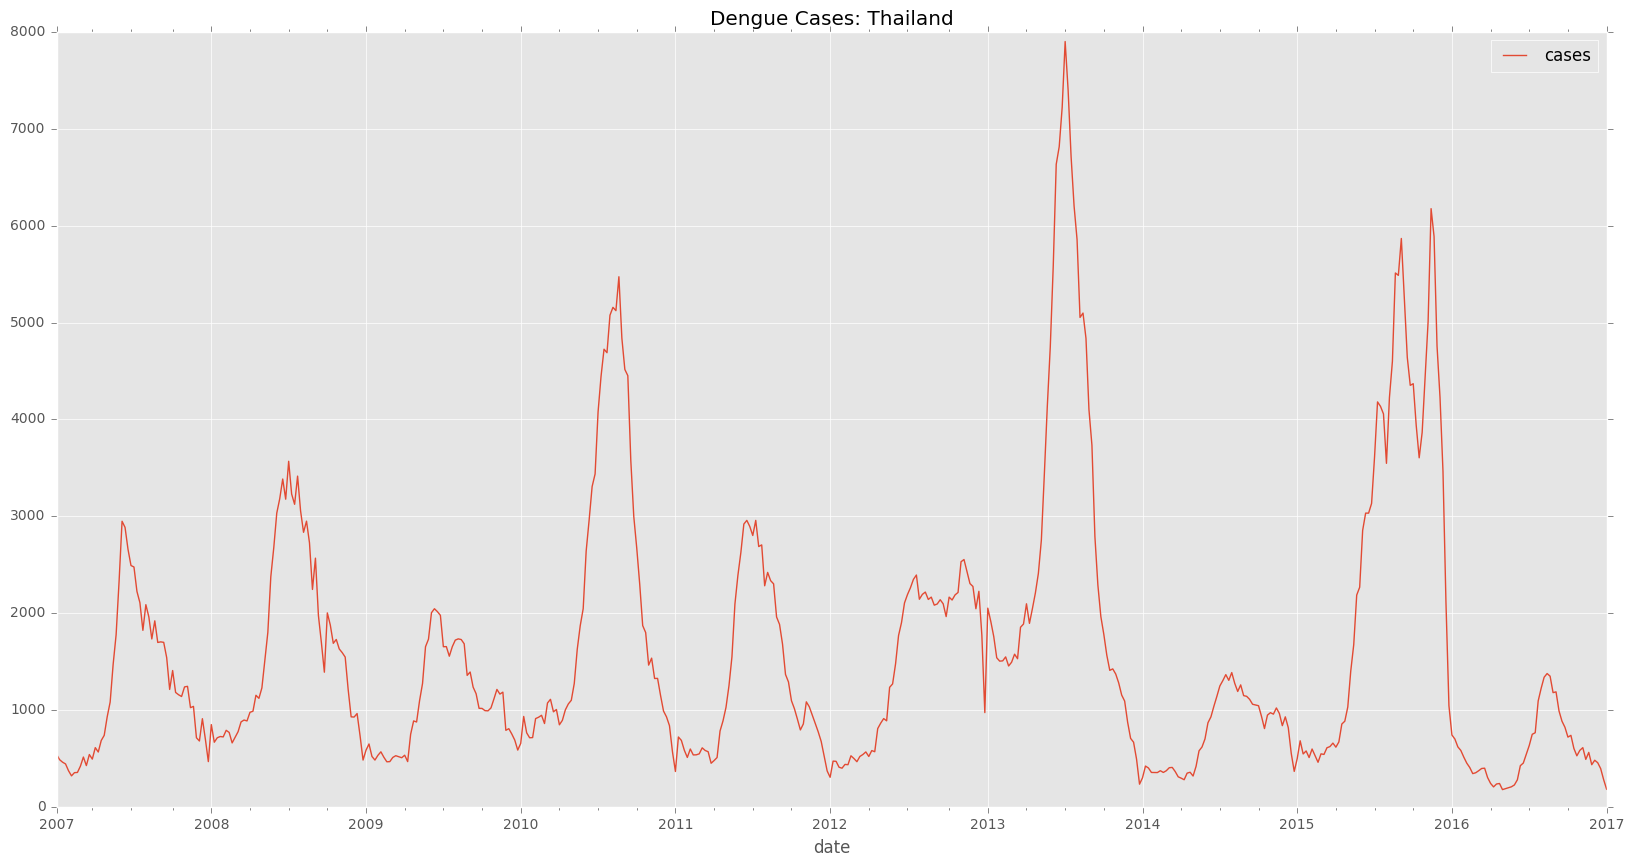

In [24]:
weekly_df = date_df.resample('W').size()
weekly_df = pd.DataFrame(weekly_df)
weekly_df = weekly_df[209:]
weekly_df.columns = ['cases']
weekly_df.cases.plot(kind='line',figsize=(20,10),label='cases')
plt.title("Dengue Cases: Thailand")
plt.legend()

In [25]:
bkk_dengues = date_df[date_df['จังหวัด'] == 'Bangkok'].resample('W').size()

In [26]:
type(bkk_dengues)

pandas.core.series.Series

In [27]:
bkk_dengues_df = pd.DataFrame(bkk_dengues)

In [28]:
bkk_dengues_df.columns = ['freq']

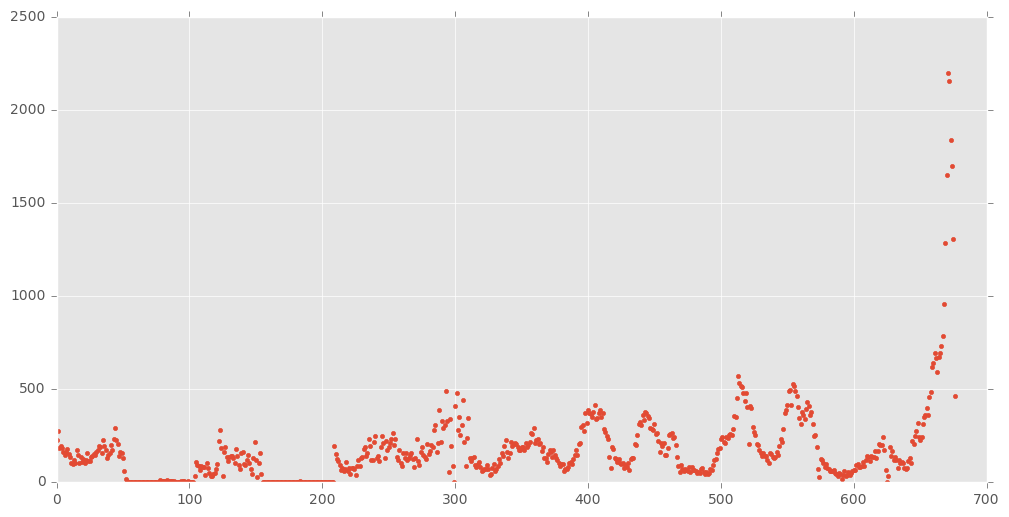

In [29]:
xs = [i for i in range(len(bkk_dengues_df))]
ys = bkk_dengues_df.freq
plt.figure(figsize=(12,6))
plt.plot(xs,ys,'.')

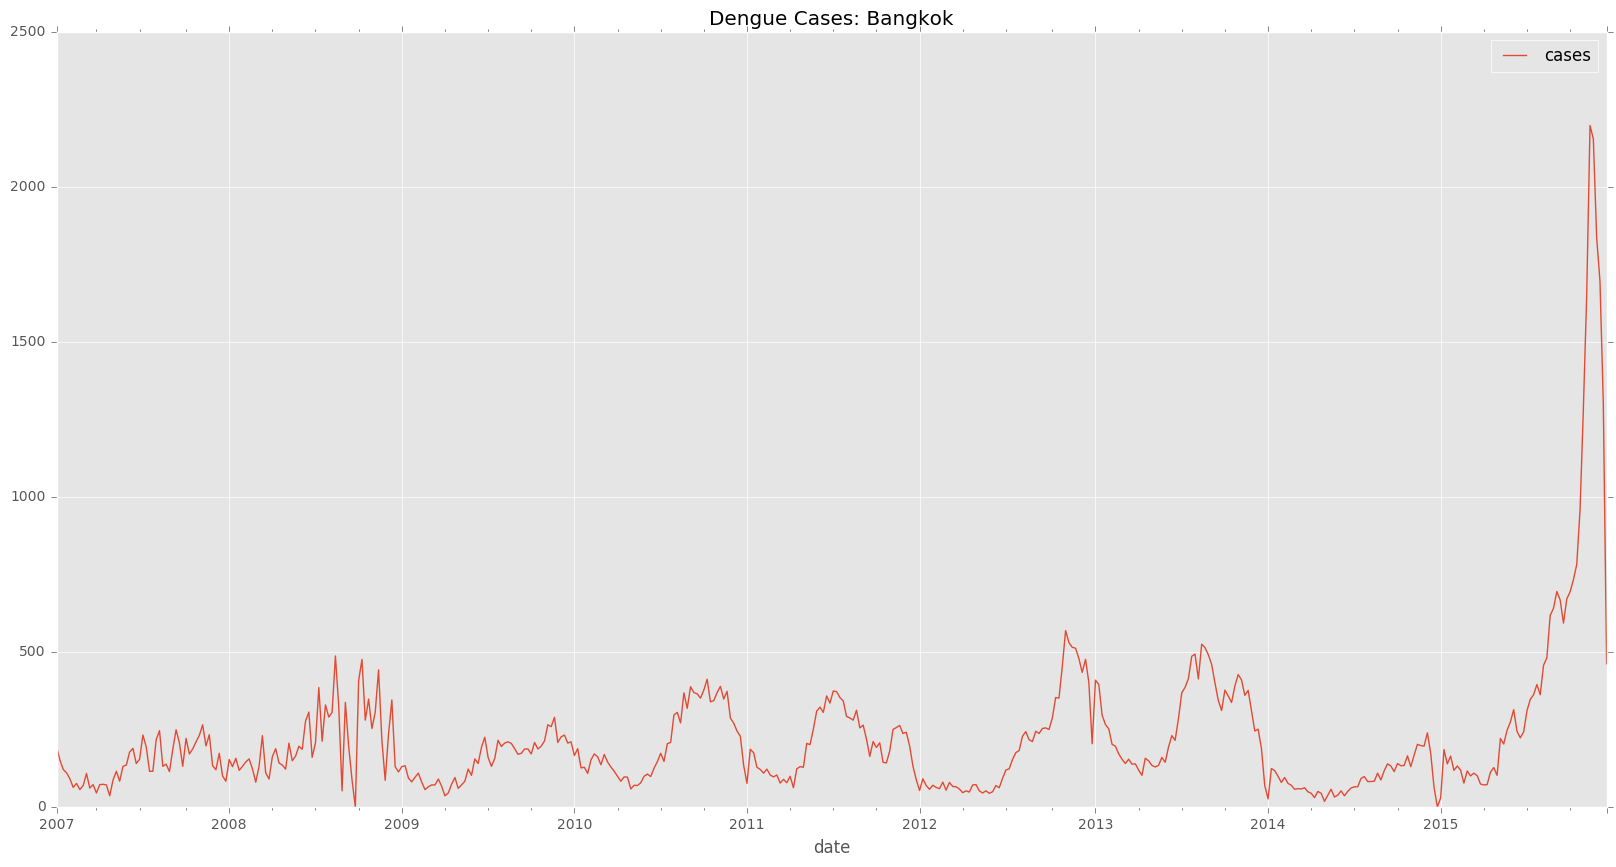

In [46]:
bkk_dengues_df['year'] = bkk_dengues_df.index.astype('str').str[:4]
bkk_dengues_df['month'] = bkk_dengues_df.index.astype('str').str[5:7]
# from 2007 onward
# bkk_dengues_df = bkk_dengues_df[209:]
bkk_dengues_df.freq.plot(figsize=(20,10),label='cases')
plt.title("Dengue Cases: Bangkok")
plt.legend()

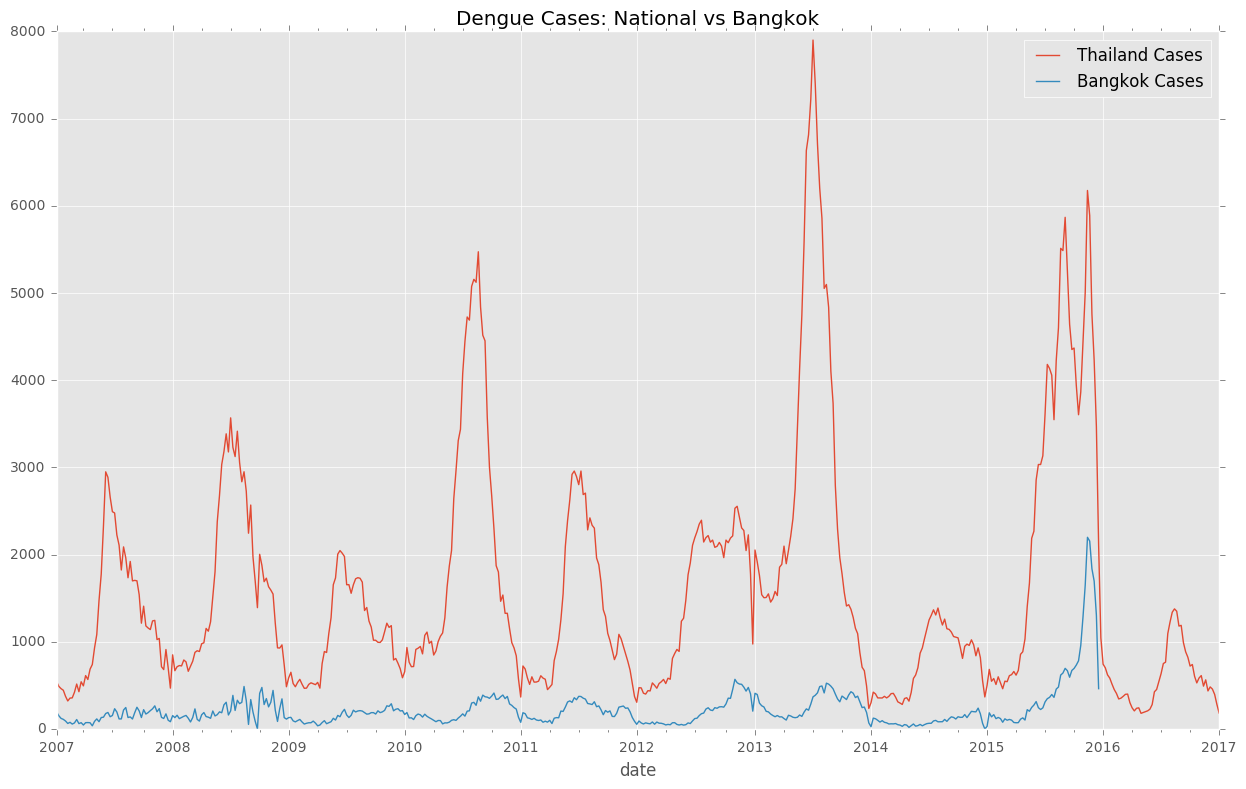

In [47]:
weekly_df.cases.plot(figsize=(15,9),label='Thailand Cases')
bkk_dengues_df.freq.plot(label='Bangkok Cases')
plt.title('Dengue Cases: National vs Bangkok')
plt.legend()

In [32]:
temperature = glob.glob("met18000/yr2001-2012/*.xls")

list_ = []
for file_ in temperature:
    df = pd.read_excel(file_)
    list_.append(df)
    allTemps = np.concatenate(list_)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [33]:
#'stn_name', 'stn_code', 'year', 'month', 'dday', 'maxtemp', 'mintemp', 'rain', 'avgrh', 'meantemp'
temp_df = pd.DataFrame(allTemps)

In [34]:
temp_df.columns = ['stn_name', 'stn_code', 'year', 'month', 'dday', 'maxtemp', 'mintemp', 'rain', 'avgrh', 'meantemp']

In [35]:
def clean_stn_name(name):
    if '\t' in name:
        return name.split('\t')[1]
    else:
        return name

In [36]:
temp_df['stn_name'] = temp_df['stn_name'].apply(clean_stn_name)

In [37]:
np.unique(np.array(temp_df['stn_name']))

array([u'Ayuttaya Agromet', u'Bangkok Metropolis*', u'Burirum*',
       u'Chacherngsao Agromet', u'Chai Nat*', u'Chaiyaphum*',
       u'Chiang Mai', u'Chiang Rai*', u'Chon Buri*', u'Kamalasai',
       u'Kamphaeng Phet*', u'Kamphaeng Saen Agromet', u'Kanchanaburi*',
       u'Khlong Yai*', u'Kho Hong Agromet', u'Kosum Phisai*', u'Krabi*',
       u'Lampang*', u'Lamphun*', u'Loei Agromet', u'Lop Buri*',
       u'Mae Hong Son*', u'Mukdahan*', u'Nakhon Phanom*',
       u'Nakhon Ratchasima*', u'Nakhon Sawan*', u'Nakhon Si Thammarat*',
       u'Nan*', u'Narathiwat*', u'Nong Khai*', u'Pathumthani Agromet',
       u'Pattani Airport*', u'Phatthalung Agromet', u'Phayao*',
       u'Phetchabun*', u'Phetchaburi*', u'Phitsanulok*', u'Phrae*',
       u'Phriu Agromet', u'Phuket*', u'Pichit Agromet', u'Pilot Station*',
       u'Prachin Buri*', u'Prachuap Khiri Khan*', u'Ranong*',
       u'Ratchaburi', u'Rayong*', u'Roi Et*', u'Sa Kaew',
       u'Sakon Nakhon Agromet', u'Satun*', u'Sawi Agromet',
       u

In [38]:
# temp_df[temp_df['stn_name'] == 'Bangkok Metropolis*']

def clean_date(date):
    if len(str(date)) == 1:
        return "0" + str(date)
    else:
        return str(date)

temp_df['month'] = temp_df['month'].apply(clean_date)
temp_df['dday'] = temp_df['dday'].apply(clean_date)

temp_df['date'] = temp_df['year'].astype('str') + "-" + \
                  temp_df['month'].astype('str') + "-" + \
                  temp_df['dday'].astype('str')



In [39]:
temp_df['date'] = pd.DatetimeIndex(temp_df.date)
temp_df = temp_df.set_index('date')

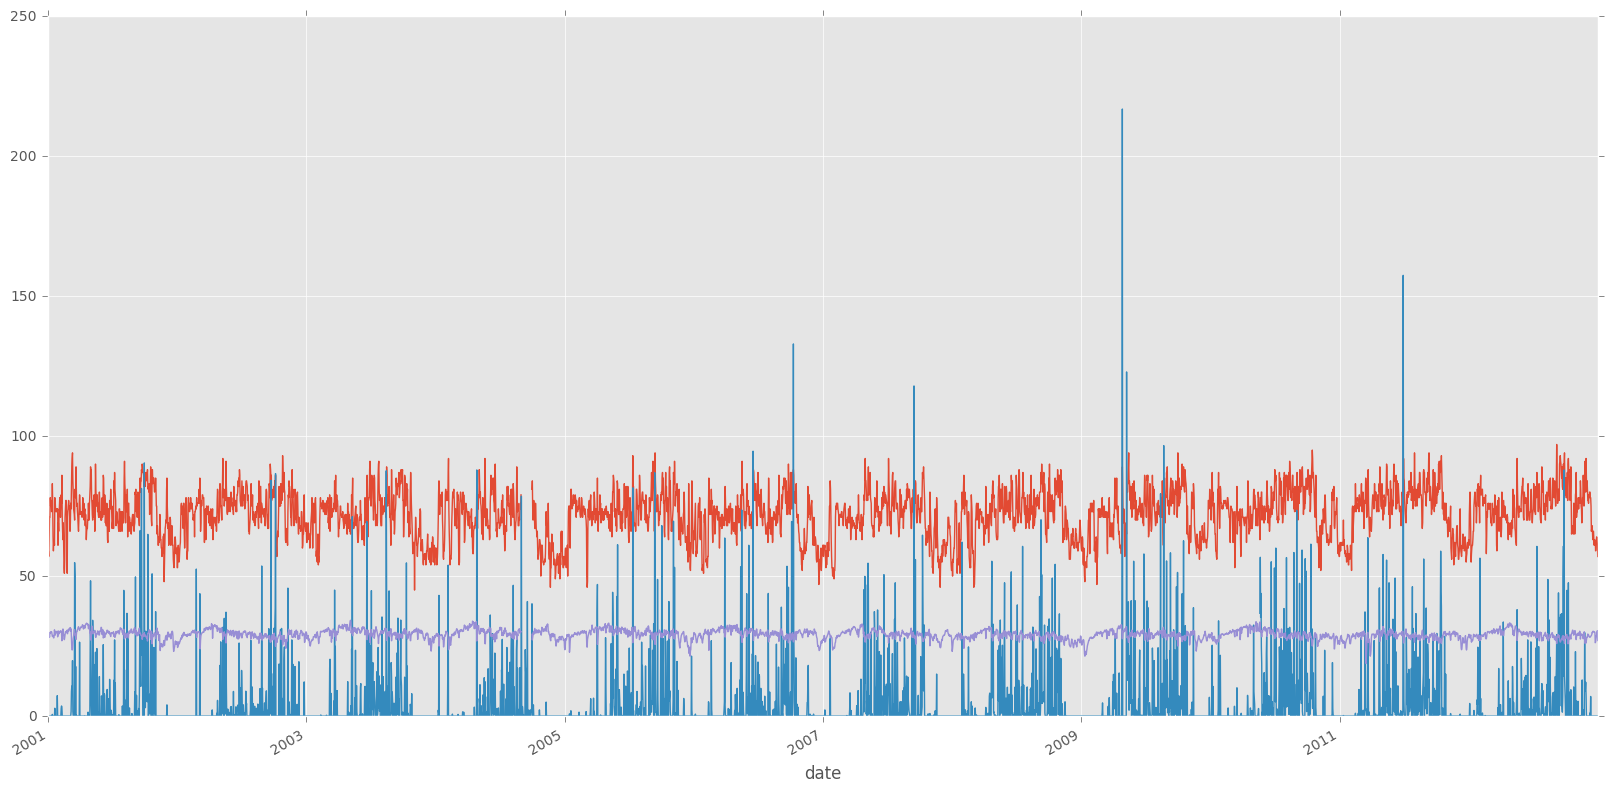

In [40]:
bkk_temperature = temp_df[temp_df['stn_name'] == 'Bangkok Metropolis*']
bkk_temperature['avgrh'].plot(figsize=(20,10))
bkk_temperature['rain'].plot()
bkk_temperature['meantemp'].plot()

In [41]:
bkk_weekly = bkk_temperature.resample('w')

In [42]:
bkk_weekly = pd.DataFrame(bkk_temperature[['rain', 'avgrh', 'meantemp']], dtype='f')
bkk_weekly = bkk_weekly.fillna(0)
bkk_weekly = bkk_weekly.resample('W').mean()

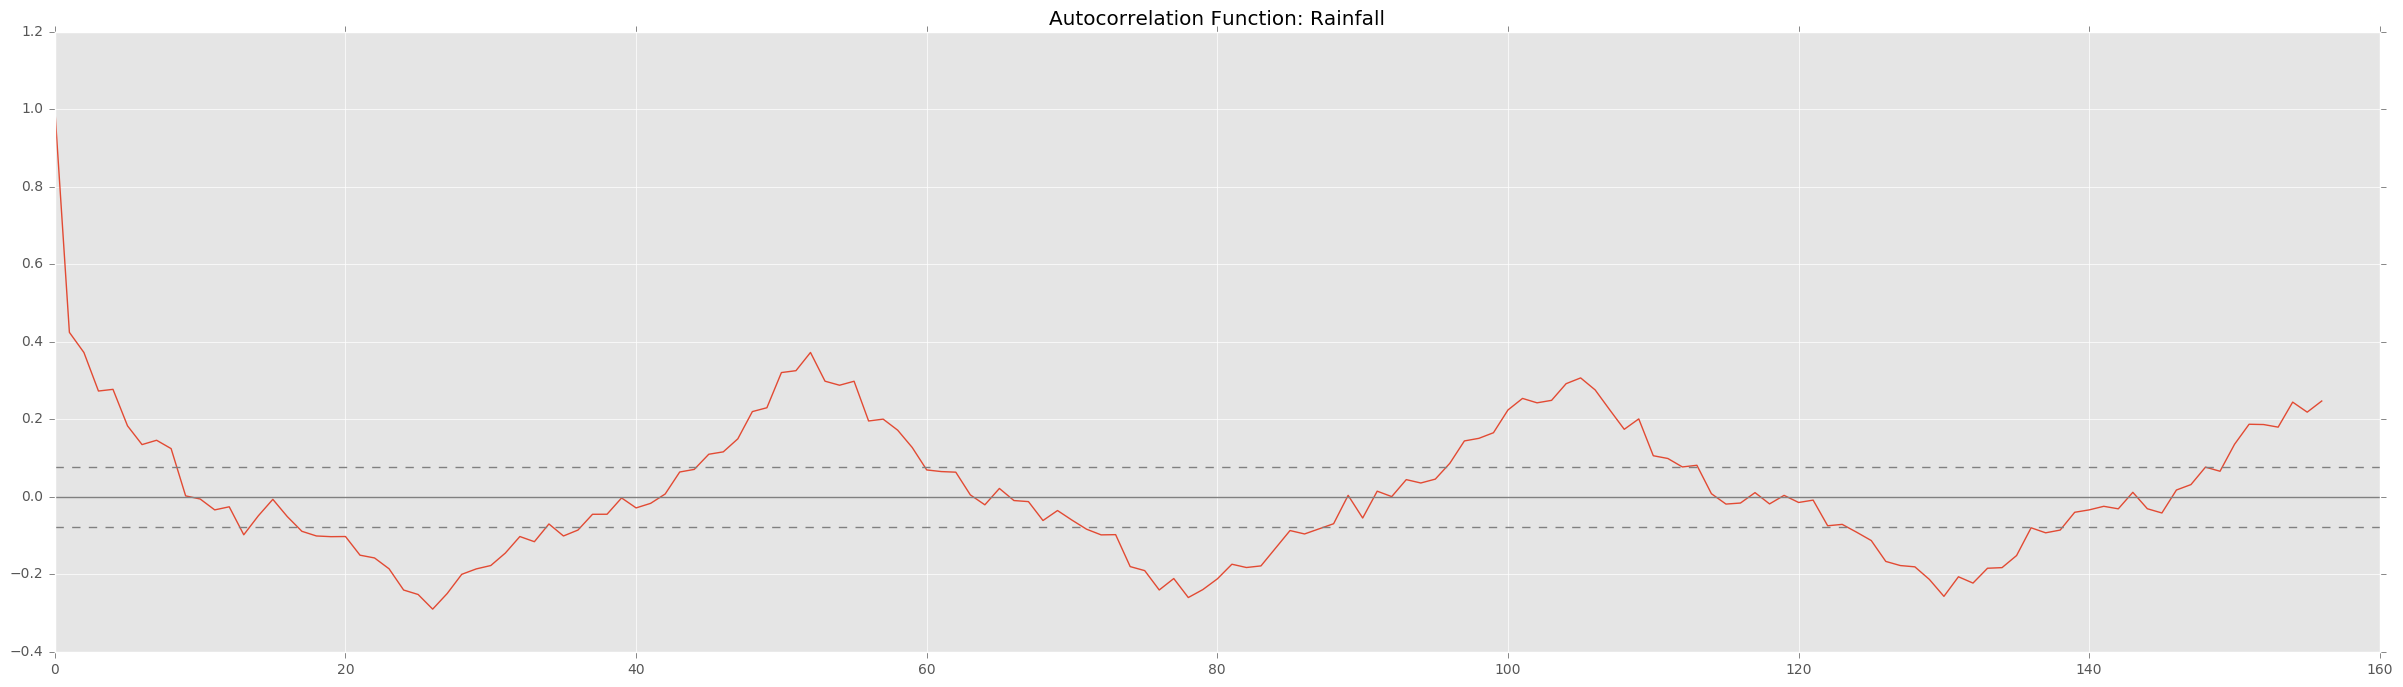

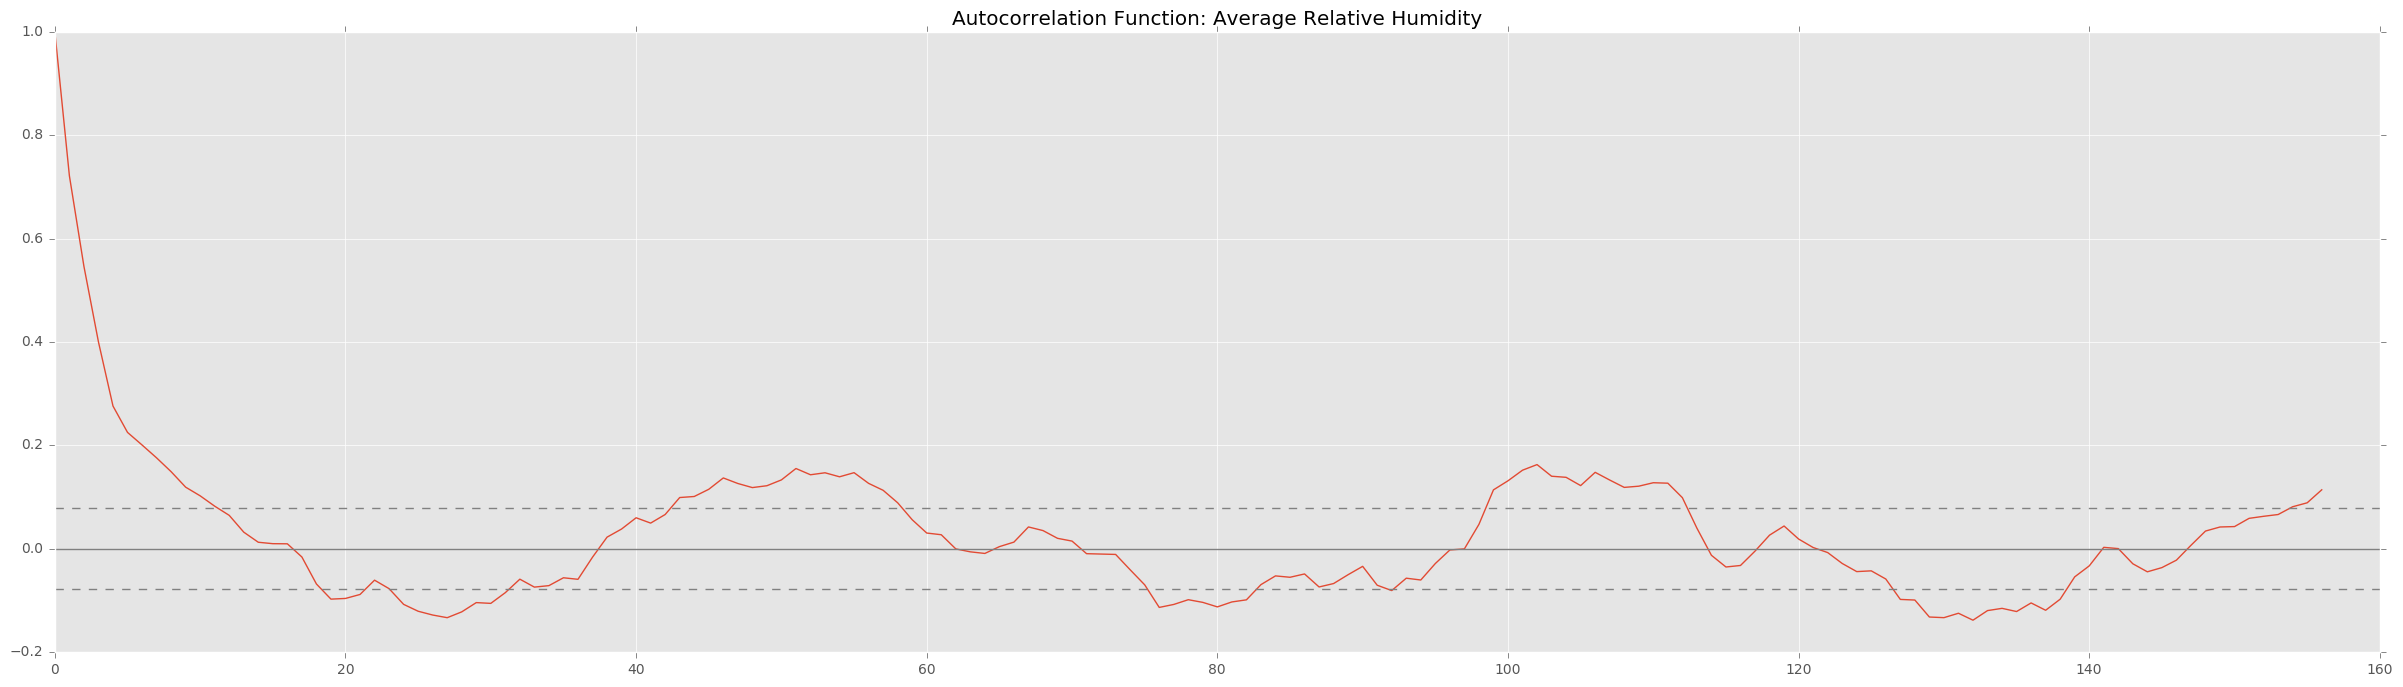

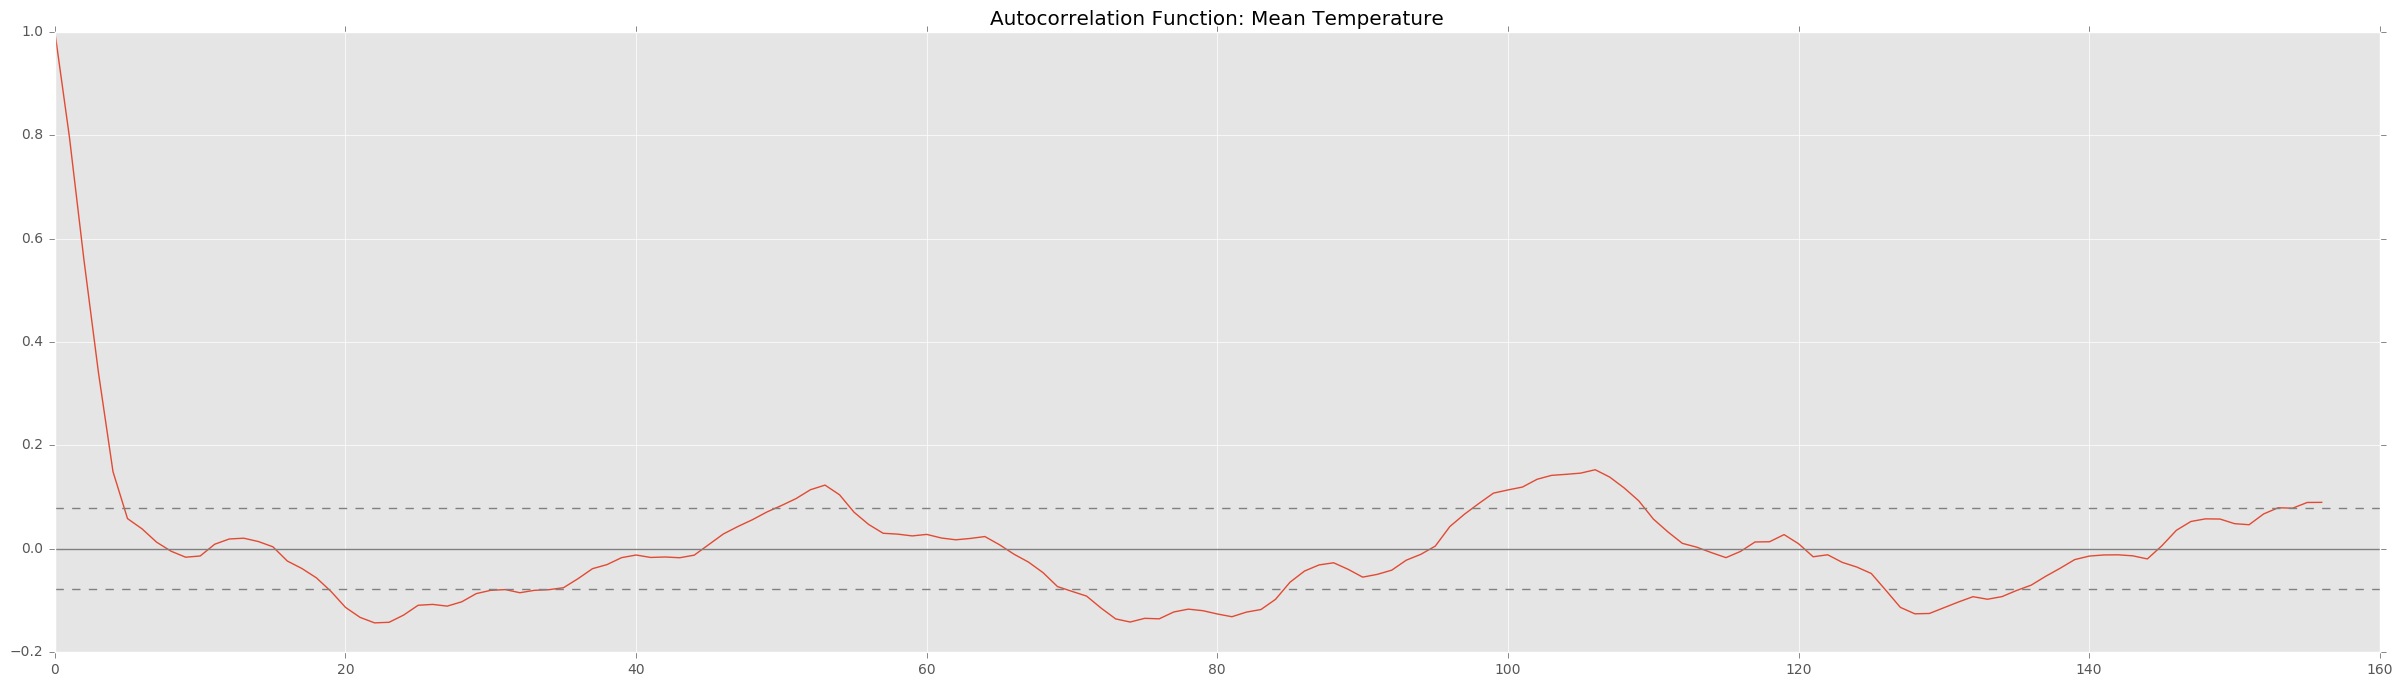

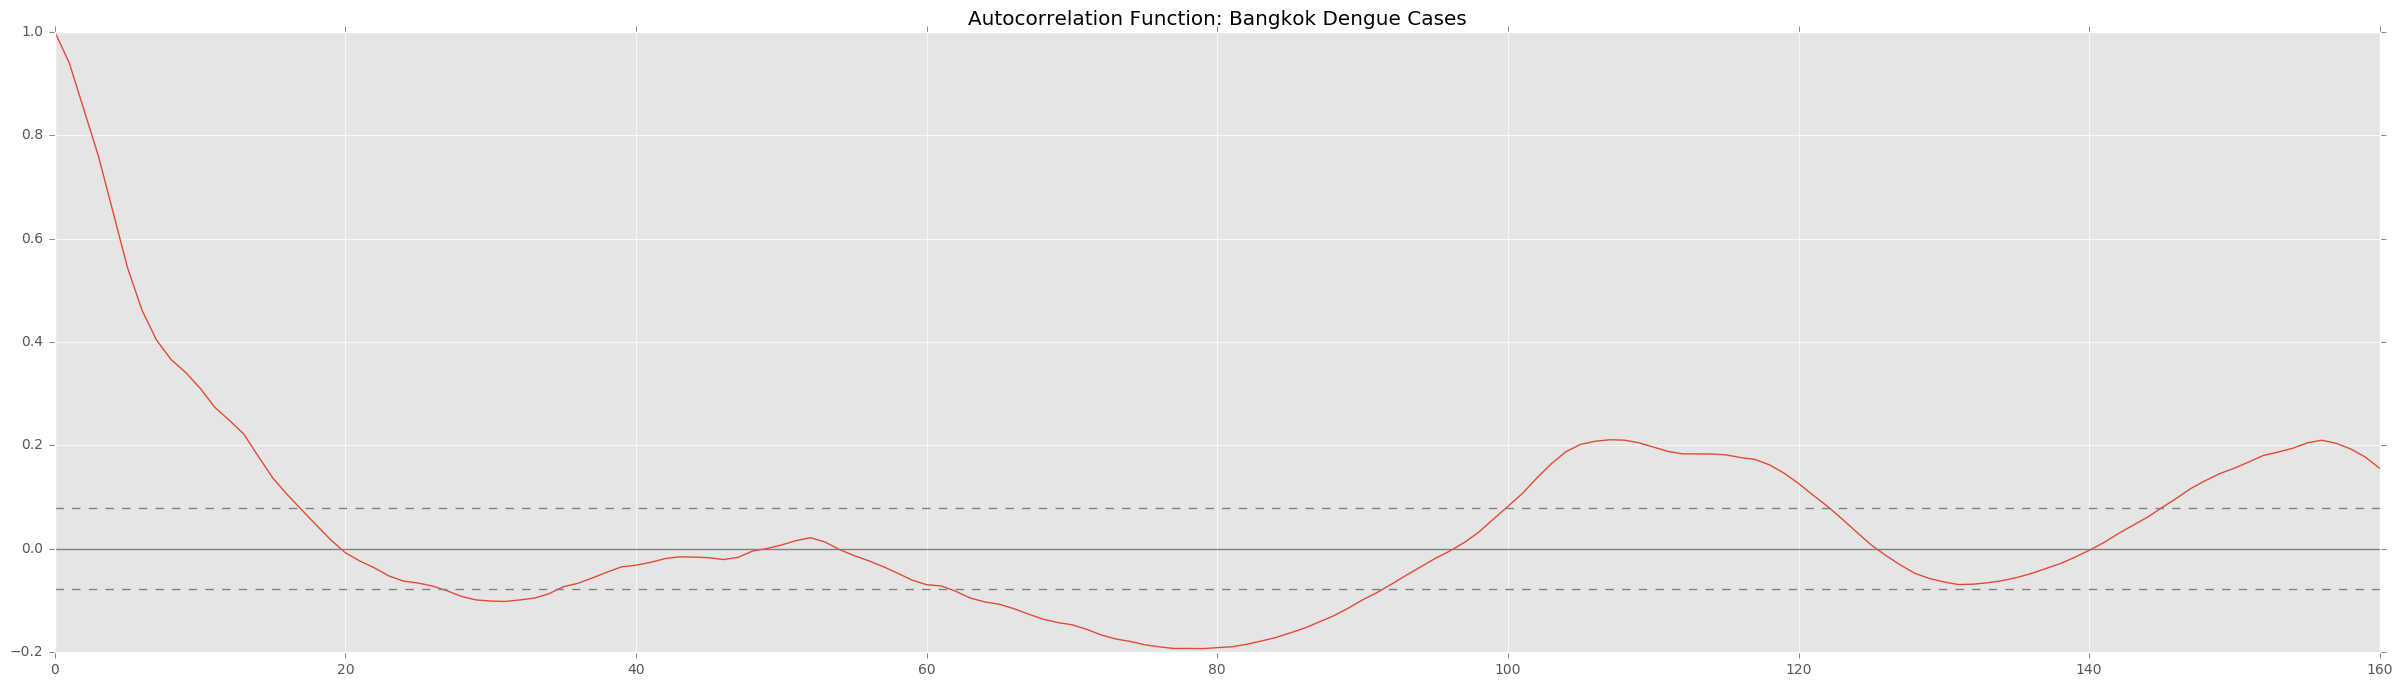

In [49]:
rain_acf = acf(bkk_weekly['rain'],nlags=len(bkk_weekly)/4)
avgrh_acf = acf(bkk_weekly['avgrh'],nlags=len(bkk_weekly)/4)
mean_temp_acf = acf(bkk_weekly['meantemp'],nlags=len(bkk_weekly)/4)
lag_acf = acf(bkk_dengues_df['freq'],nlags=160)

plt.figure(figsize=(30,8))
plt.plot(rain_acf)
plt.axhline(y=0,color='gray')
plt.axhline(y=-1.96/np.sqrt(len(bkk_weekly.rain)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(bkk_weekly.rain)),linestyle='--',color='gray')
plt.title('Autocorrelation Function: Rainfall')

plt.figure(figsize=(30,8))
plt.plot(avgrh_acf)
plt.axhline(y=0,color='gray')
plt.axhline(y=-1.96/np.sqrt(len(bkk_weekly.rain)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(bkk_weekly.rain)),linestyle='--',color='gray')
plt.title('Autocorrelation Function: Average Relative Humidity')

plt.figure(figsize=(30,8))
plt.plot(mean_temp_acf)
plt.axhline(y=0,color='gray')
plt.axhline(y=-1.96/np.sqrt(len(bkk_weekly.rain)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(bkk_weekly.rain)),linestyle='--',color='gray')
plt.title('Autocorrelation Function: Mean Temperature')

plt.figure(figsize=(30,8))
plt.plot(lag_acf)
plt.axhline(y=0,color='gray')
plt.axhline(y=-1.96/np.sqrt(len(bkk_weekly.rain)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(bkk_weekly.rain)),linestyle='--',color='gray')
plt.title('Autocorrelation Function: Bangkok Dengue Cases')

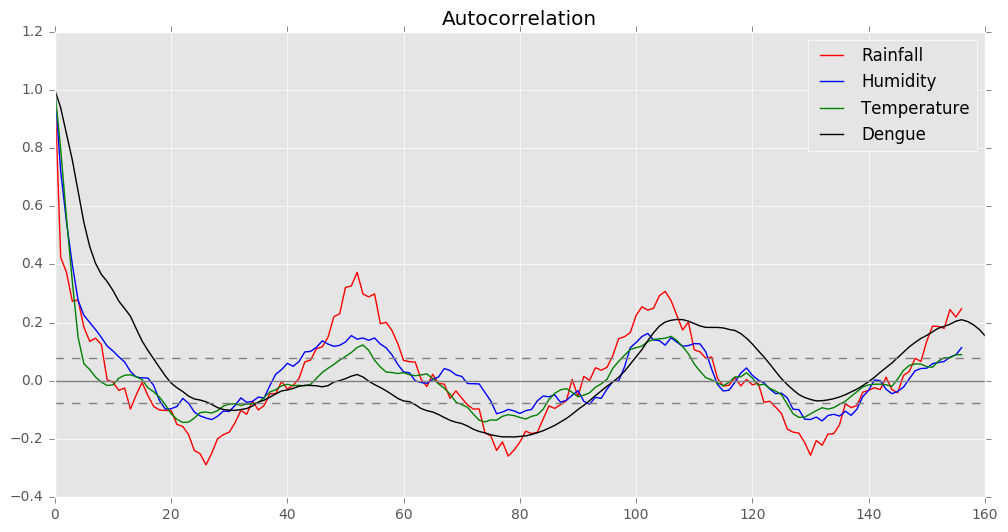

In [50]:
plt.figure(figsize=(12,6))
plt.plot(rain_acf,'-r',label='Rainfall')
plt.plot(avgrh_acf,'-b',label='Humidity')
plt.plot(mean_temp_acf,'-g',label='Temperature')
plt.plot(lag_acf,'-k',label='Dengue')
plt.axhline(y=0,color='gray')
plt.axhline(y=-1.96/np.sqrt(len(bkk_weekly.rain)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(bkk_weekly.rain)),linestyle='--',color='gray')
plt.legend()
plt.title('Autocorrelation')

In [45]:
# correlation between time series